## Entendimiento del negocio:

Se cuenta con un cliente médico el cual tiene la necesidad de clasificar el estado cardiaco de los fetos con los estados de normal, sospechoso y con patología cardiaca, de esta manera se indica que debe haber un nivel de confianza de mínimo el 85% y acude directamente al área analítica para solventar el problema.

## Enfoque analítico:

El problema cuenta con 2126 datos con los cuales se busca entrenar un modelo de clasificación el cual tenga la capacidad de clasificar el estado de un feto en las tres diferentes clases presentadas además de que debe contar con un accuracy de más del 85%.

## Importar Librerias

In [2]:
#Importar librerias
#TRATAMIENTO DE DATOS
import numpy as np
import pandas as pd
#GRÁFICOS
import matplotlib.pyplot as plt
import seaborn as sb
#PREPARACIÓN DE DATOS
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split
#MODELADO
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#BUSQUEDA DE HIPERPARAMETROS
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#EVALUACIÓN
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
#ADVERTENCIAS
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(69)

In [4]:
datos = pd.read_csv('data/caso2_fetal.csv', sep=',')
datos.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Exploracion de datos

In [5]:
#Identificar cantidad de nulos y topologias
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
datos.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### Análisis Univariado

['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']


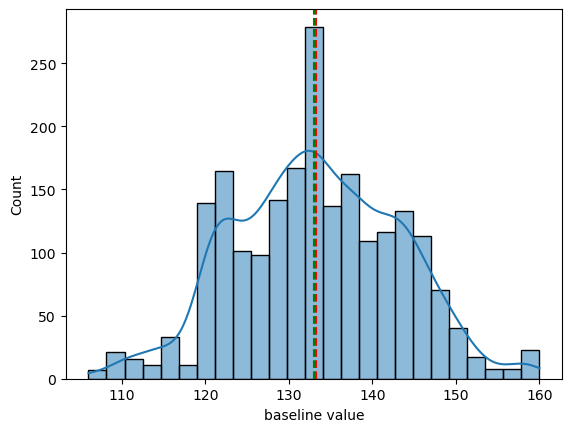

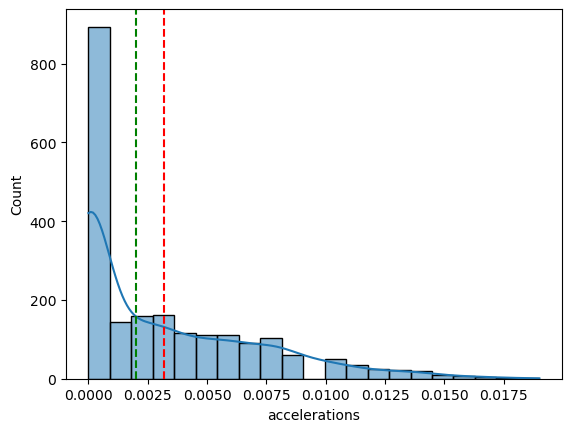

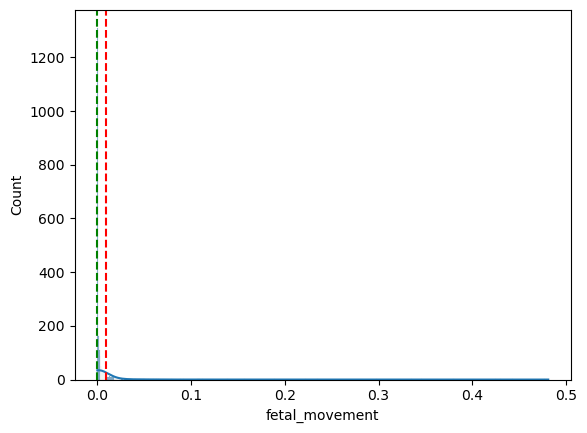

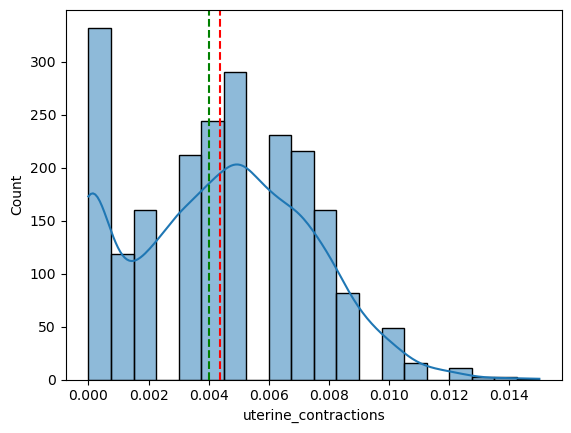

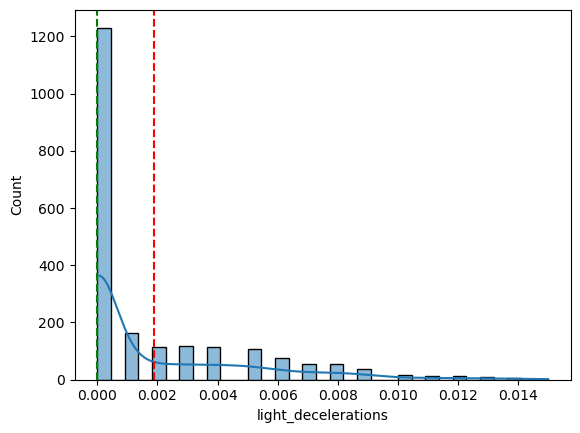

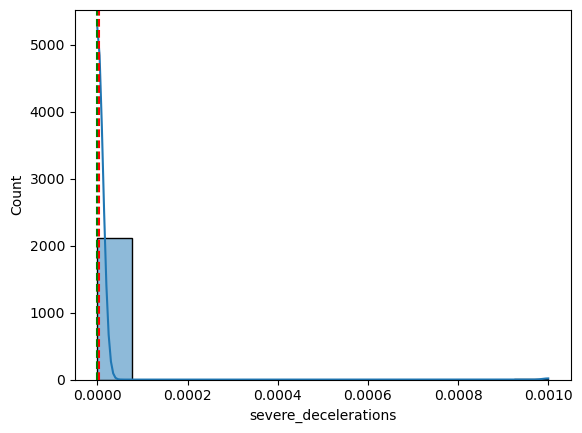

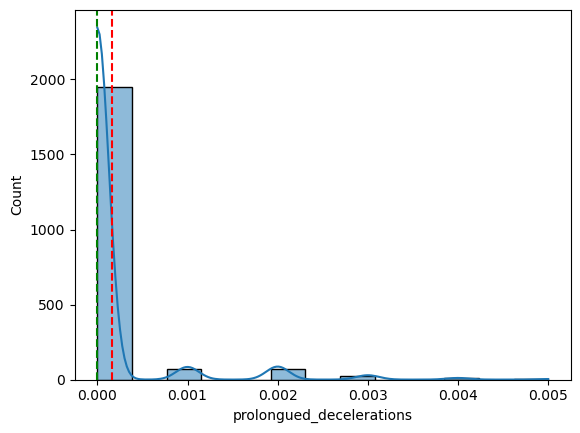

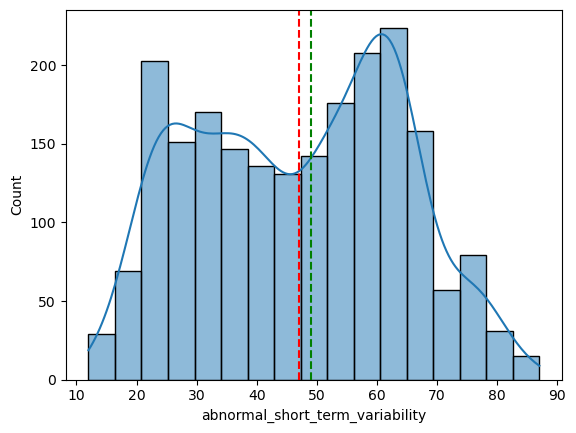

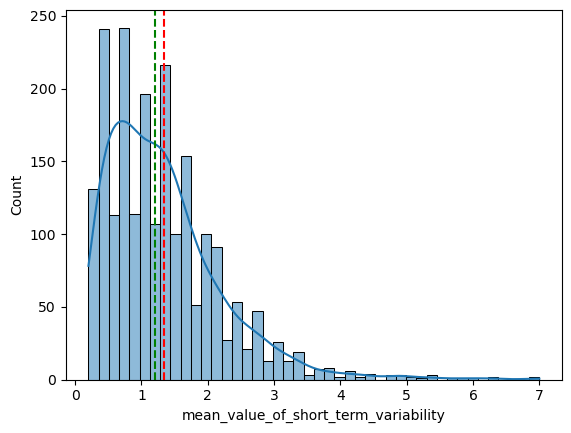

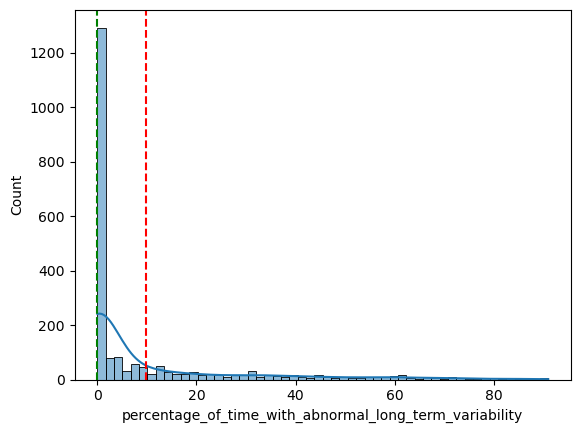

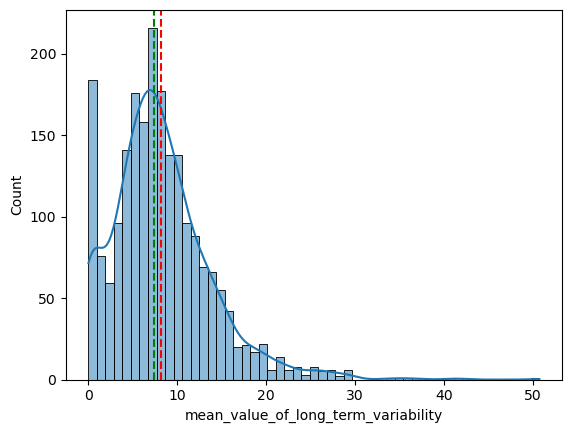

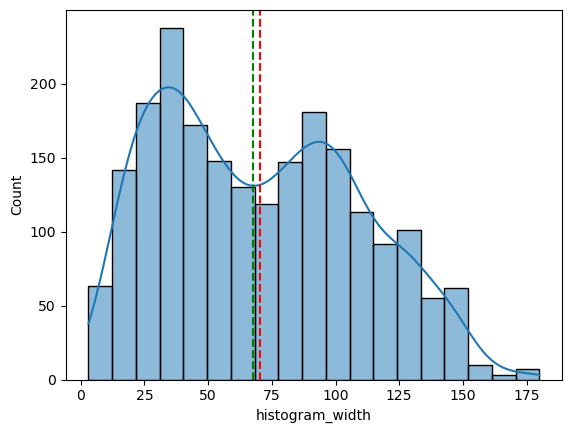

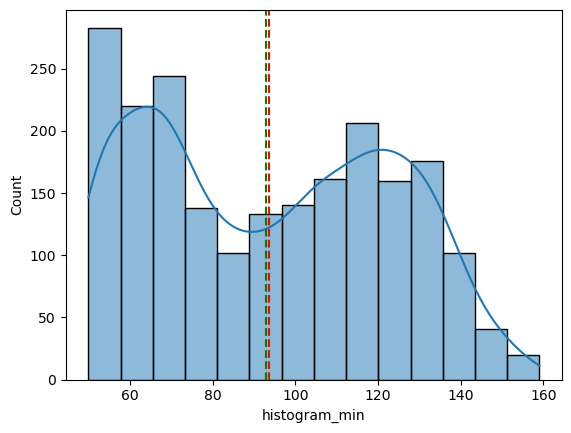

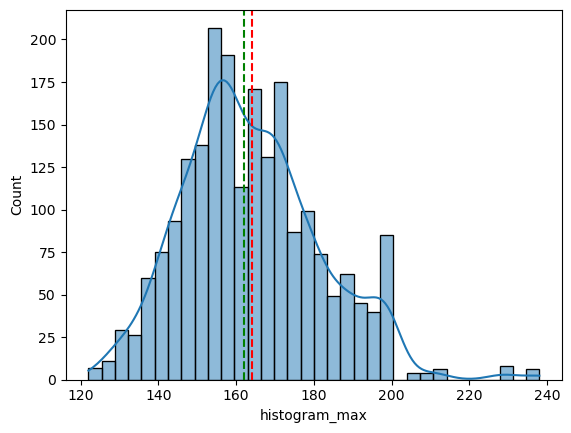

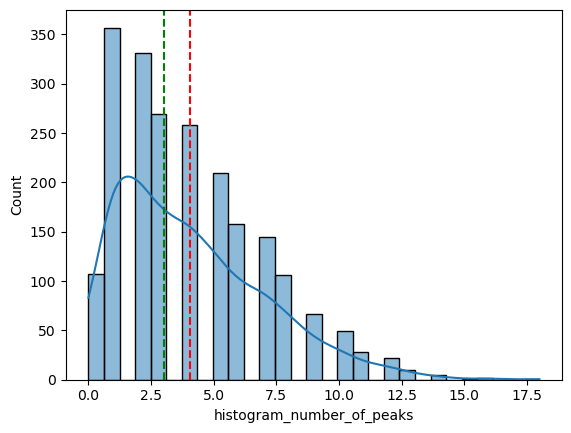

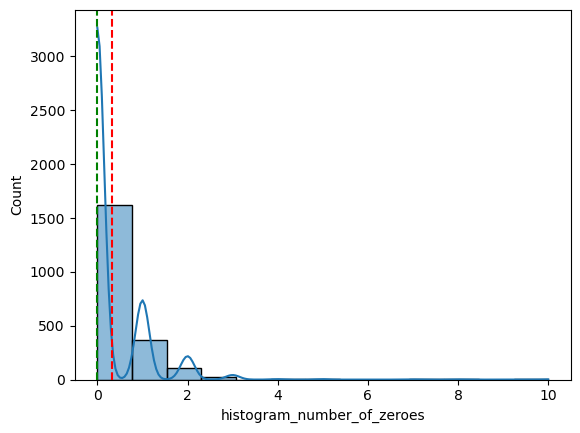

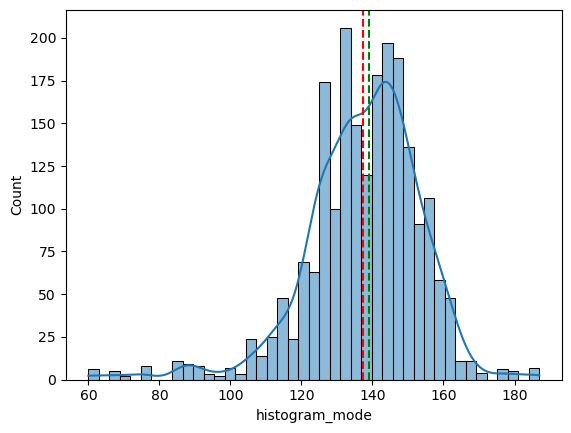

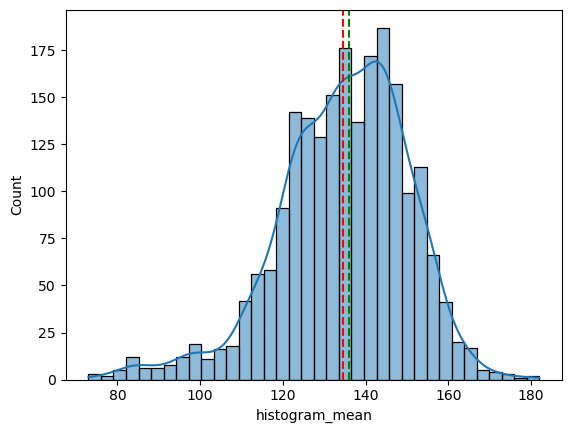

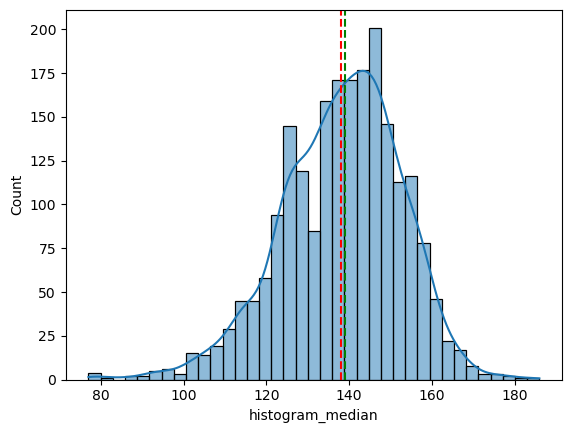

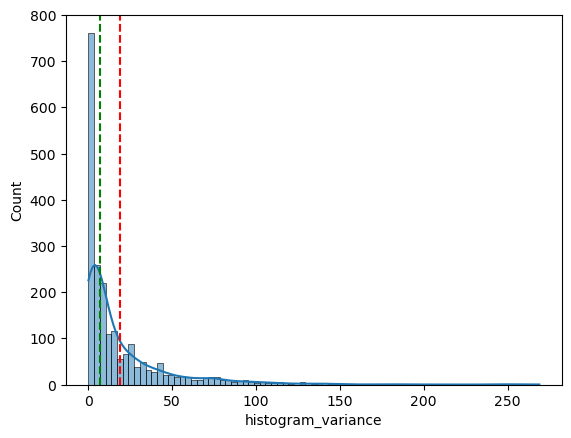

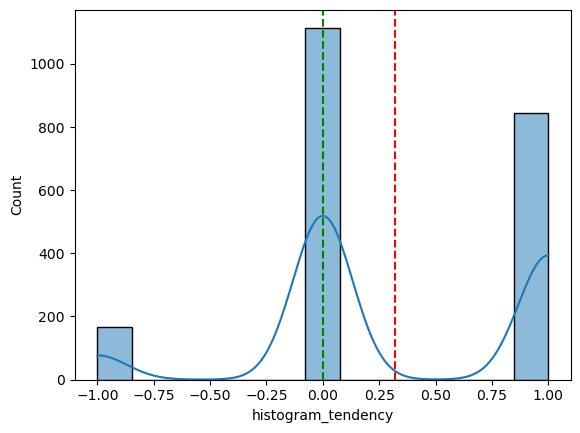

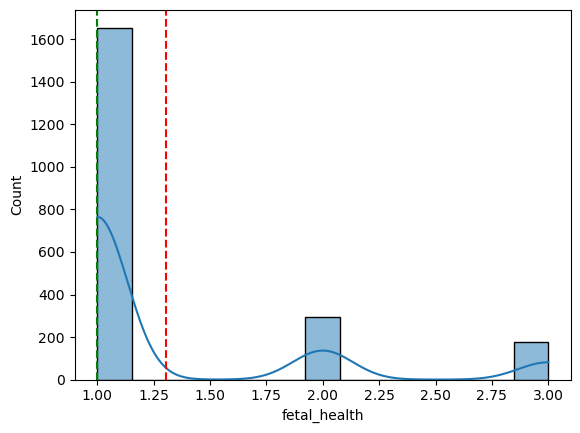

In [7]:
columns = datos.select_dtypes(include=['float64']).columns.tolist()
print(columns)
for column in columns:
  sb.histplot(data = datos, x = column , kde = True)
  plt.axvline(x = datos[column].mean(), color = 'red', linestyle = 'dashed')
  plt.axvline(x = datos[column].median(), color = 'green', linestyle = 'dashed')
  plt.show()

### Análisis Bivariado

<function matplotlib.pyplot.show(close=None, block=None)>

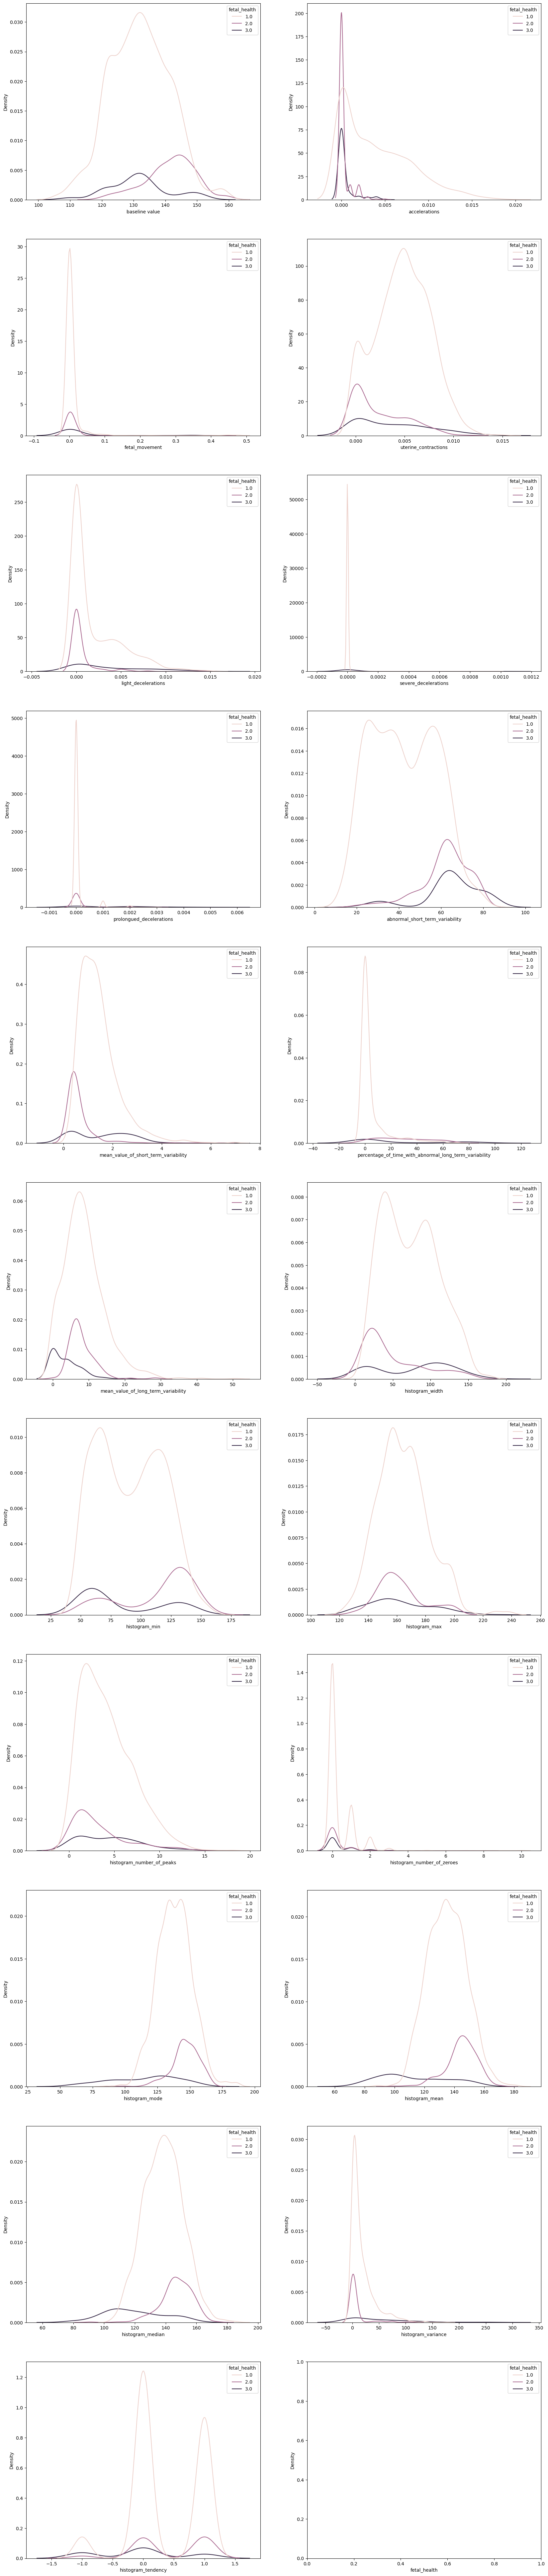

In [8]:
nRows = 11
nCols = 2

fig, ax = plt.subplots(nRows, nCols, figsize = (20, 100))
for i, col in enumerate(datos.columns):
    sb.kdeplot(data = datos, x = col, hue='fetal_health', ax = ax[i//nCols,i%nCols])

plt.show 

## Remuestreo

### Código Remuestreo

In [9]:
#Generar un df por el estado del feto
datos_Normal = datos[datos['fetal_health'] == 1]
datos_Normal.shape

(1655, 22)

In [10]:
#Generar un df por el estado del feto
datos_Sospechoso = datos[datos['fetal_health'] == 2]
datos_Sospechoso.shape

(295, 22)

In [11]:
#Generar un df por el estado del paciente
datos_Patologico = datos[datos['fetal_health'] == 3]
datos_Patologico.shape

(176, 22)

In [12]:
#Remuestreo
datos_Sospechoso_re = datos_Sospechoso.sample(datos_Normal.shape[0], replace =True)
datos_Sospechoso_re.shape

(1655, 22)

In [13]:
#Remuestreo
datos_Patologico_re = datos_Patologico.sample(datos_Normal.shape[0], replace =True)
datos_Patologico_re.shape

(1655, 22)

In [14]:
datos_re = pd.concat([datos_Normal, datos_Sospechoso_re, datos_Patologico_re])
datos_re.shape

(4965, 22)

In [15]:
datos_re = datos_re.reset_index(drop = True)
datos_re

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
1,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
2,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
3,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
4,131.0,0.005,0.072,0.008,0.003,0.0,0.000,28.0,1.4,0.0,...,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,134.0,0.004,0.001,0.001,0.004,0.0,0.003,60.0,1.6,0.0,...,71.0,184.0,7.0,0.0,89.0,118.0,113.0,195.0,-1.0,3.0
4961,150.0,0.000,0.000,0.001,0.000,0.0,0.000,81.0,0.4,17.0,...,130.0,174.0,2.0,0.0,152.0,150.0,151.0,1.0,0.0,3.0
4962,148.0,0.000,0.003,0.000,0.000,0.0,0.000,70.0,0.3,69.0,...,136.0,154.0,3.0,0.0,150.0,148.0,150.0,0.0,1.0,3.0
4963,150.0,0.000,0.004,0.000,0.000,0.0,0.000,82.0,0.4,38.0,...,148.0,160.0,0.0,0.0,152.0,154.0,155.0,1.0,0.0,3.0


In [16]:
datos_re.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,...,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000
mean,135.432830,0.001535,0.014563,0.003672,0.001989,0.000010,0.000469,56.400201,1.191621,19.192951,...,96.892447,162.856798,3.895065,0.310977,133.747029,131.424371,135.538369,24.477543,0.249144,2.000000
std,9.999485,0.002969,0.062330,0.003214,0.003266,0.000099,0.001021,17.070337,0.983305,25.906868,...,33.403024,18.462537,3.108511,0.736667,22.100278,20.762950,18.226703,41.951261,0.657322,0.816579
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,129.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.400000,0.000000,...,63.000000,151.000000,1.000000,0.000000,125.000000,121.000000,124.000000,1.000000,0.000000,1.000000
50%,135.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.000000,61.000000,0.900000,4.000000,...,101.000000,160.000000,3.000000,0.000000,140.000000,136.000000,140.000000,4.000000,0.000000,2.000000
75%,144.000000,0.002000,0.003000,0.006000,0.003000,0.000000,0.000000,67.000000,1.700000,33.000000,...,129.000000,173.000000,6.000000,0.000000,150.000000,147.000000,149.000000,31.000000,1.000000,3.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### Resultados Remuestreo

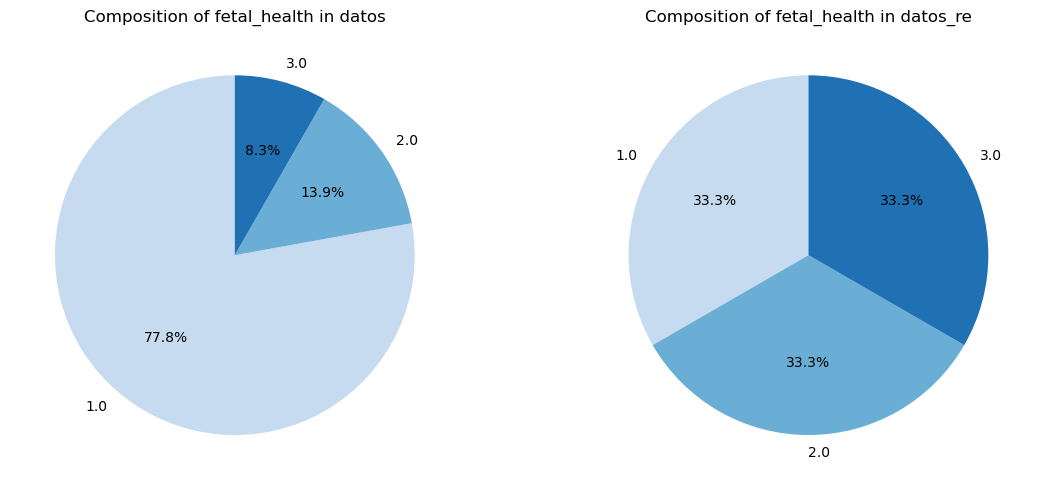

In [91]:
# Assuming datos and datos_re are your two datasets
fetal_health_datos = datos['fetal_health'].value_counts()
fetal_health_datos_re = datos_re['fetal_health'].value_counts()

colors = sb.color_palette("Blues", n_colors=3)

# Create subplots for side-by-side pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first pie chart for 'datos'
axs[0].pie(fetal_health_datos, labels=fetal_health_datos.index, autopct='%1.1f%%', startangle=90, colors = colors)
axs[0].set_title('Composition of fetal_health in datos')

# Plot the second pie chart for 'datos_re'
axs[1].pie(fetal_health_datos_re, labels=fetal_health_datos_re.index, autopct='%1.1f%%', startangle=90, colors = colors)
axs[1].set_title('Composition of fetal_health in datos_re')

# Display the plots side by side
plt.tight_layout()
plt.show()

## Análisis Bivariado Tras Remuestreo

<function matplotlib.pyplot.show(close=None, block=None)>

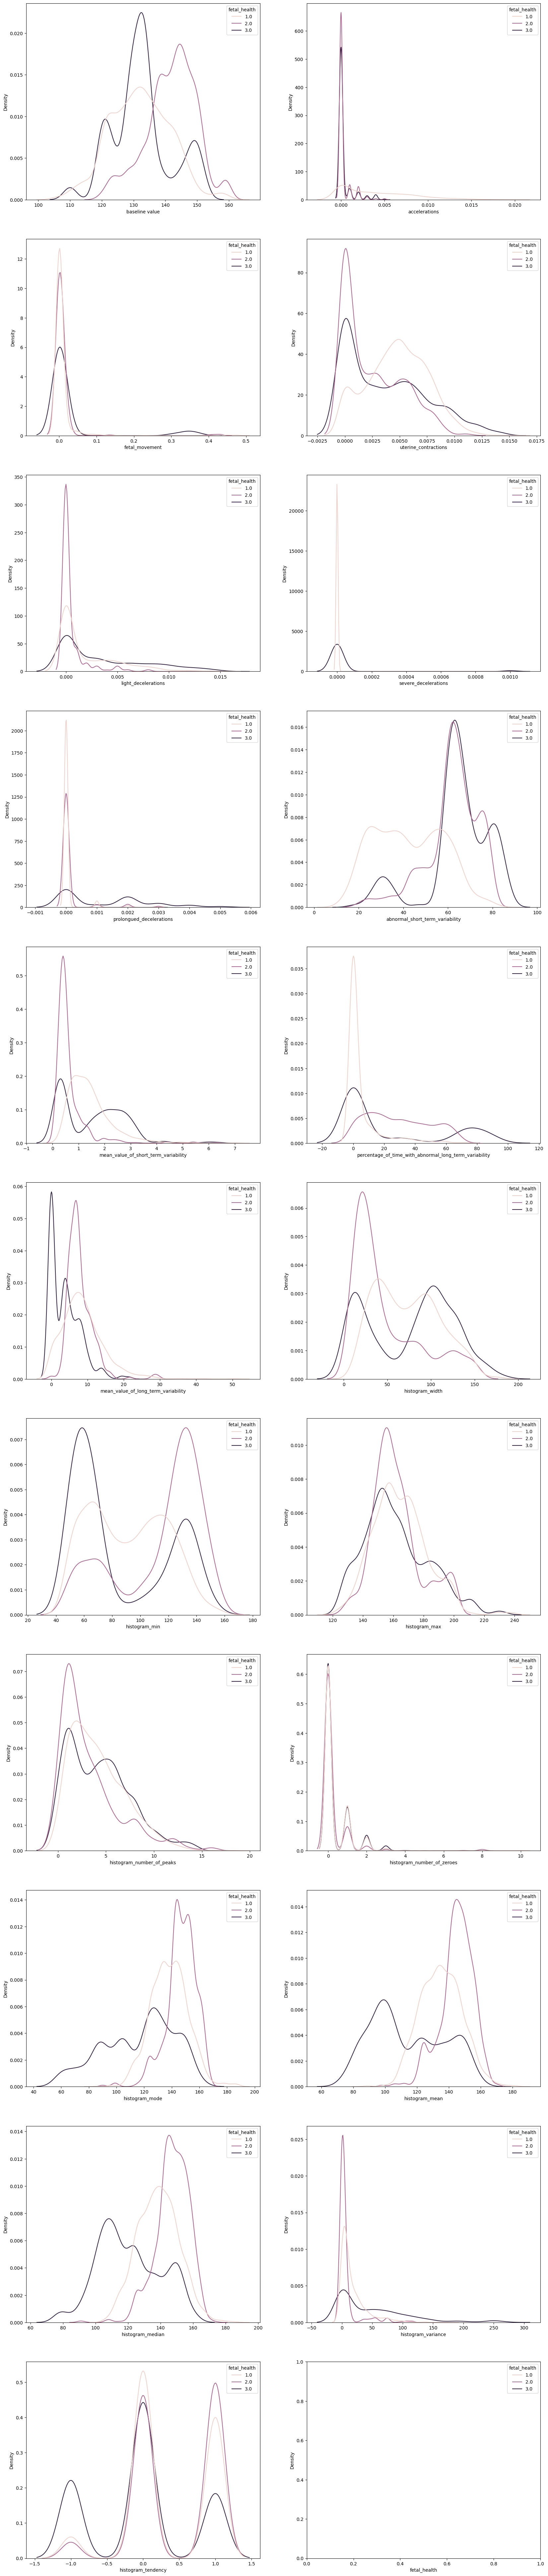

In [17]:
# sb.kdeplot(data = datos_re, x = 'fetal_movement', hue='fetal_health')

nRows = 11
nCols = 2

fig, ax = plt.subplots(nRows, nCols, figsize = (20, 100))
for i, col in enumerate(datos.columns):
    sb.kdeplot(data = datos_re, x = col, hue='fetal_health', ax = ax[i//nCols,i%nCols])

plt.show 

# for var in datos_re.columns:
#     sb.kdeplot(data = datos_re, x = var, hue='fetal_health')
#     plt.show

## Transformación De Datos

In [18]:
#Separación de variables por tipo
numCols = datos_re.drop('fetal_health', axis = 1).columns.to_list()
yCols = datos_re[['fetal_health']].columns.to_list()

#Crear los transformadores de variables
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])

#Diseñar el transformador de columnas
preprocesador = ColumnTransformer(transformers = [
    ('num', numTransformer, numCols),
], remainder = 'passthrough')

set_config(display = 'diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['baseline value', 'accelerations',
                                  'fetal_movement', 'uterine_contractions',
                                  'light_decelerations', 'severe_decelerations',
                                  'prolongued_decelerations',
                                  'abnormal_short_term_variability',
                                  'mean_value_of_short_term_variability',
                                  'percentage_of_time_with_abnormal_long_term_variability',
                                  'mean_value_of_long_term_variability',
                                  'histogram_width', 'histogram_min',
                                  'histogram_max', 'histogram_number_of_peaks',
                                  'histogram_number_of_zeroes',
                                  'histogram_mode', 'histogram_mean',
                                  'histogram_median', 'histogram_variance',
                                  'histogram_tendency'])])

In [19]:
datosPre = preprocesador.fit_transform(datos_re)
labels = np.concatenate([numCols, yCols])
datosPro = pd.DataFrame(datosPre, columns = labels)
datosPro.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,0.481481,0.315789,0.000000,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.0,...,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5,1.0
1,0.500000,0.157895,0.000000,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.0,...,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5,1.0
2,0.518519,0.157895,0.000000,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.0,...,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0,1.0
3,0.481481,0.368421,0.000000,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.0,...,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0,1.0
4,0.462963,0.263158,0.149688,0.533333,0.2,0.0,0.0,0.213333,0.176471,0.0,...,0.348624,0.275862,0.277778,0.0,0.590551,0.559633,0.550459,0.026022,1.0,1.0


In [20]:
#separacion
x = datosPro.drop('fetal_health', axis = 1)
y = datosPro[['fetal_health']]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.9)

# Modelos de clasificacion

## Logistic Regression

### Entrenamiento

In [24]:
modelo_1 = LogisticRegression(solver = 'saga')
# hiper_grid = {'penalty':['l1', 'l2', 'elasticnet', None], 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 15, 20, 50, 35, 100]}

# Tras evaluar, los mejores desempeños estaban entre c = 10 y c = 20 entonces vamos a profundizar
hiper_grid = {'penalty':['l1', 'l2', 'elasticnet', None], 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10,11,12,13,14,15,16,17,18,19, 20,100]}

In [25]:
#Búsqueda exhaustiva
classifier_e = GridSearchCV(estimator = modelo_1, param_grid = hiper_grid, cv = 5)
classifier_e.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [26]:
validation = pd.concat([pd.DataFrame(classifier_e.cv_results_['params']), pd.DataFrame(classifier_e.cv_results_['mean_test_score'], columns = ['Accuracy'])], axis = 1)
validation.sort_values('Accuracy', ascending = False)

,C,penalty,Accuracy
20,10.000,l1,0.860335
61,20.000,l2,0.859664
53,18.000,l2,0.859664
7,0.001,None,0.859663
47,16.000,None,0.859663
...,...,...,...
50,17.000,elasticnet,NaN
54,18.000,elasticnet,NaN
58,19.000,elasticnet,NaN
62,20.000,elasticnet,NaN


In [27]:
modelo_1_final = classifier_e.best_estimator_
modelo_1_final

LogisticRegression(C=10, penalty='l1', solver='saga')

### Métricas En Entrenamiento

In [28]:
y_pred_train_final_1 = modelo_1_final.predict(x_train)
accuracy_train_1_final = accuracy_score(y_train, y_pred_train_final_1)
matrix_train_1_final = confusion_matrix(y_train, y_pred_train_final_1)
f1_train_1_final = f1_score(y_train, y_pred_train_final_1, average='weighted')

Accuracy del entrenamiento para regresion logistica es: 0.8679498657117278
F1 score del entrenamiento para regresion logistica es: 0.8689801030601598


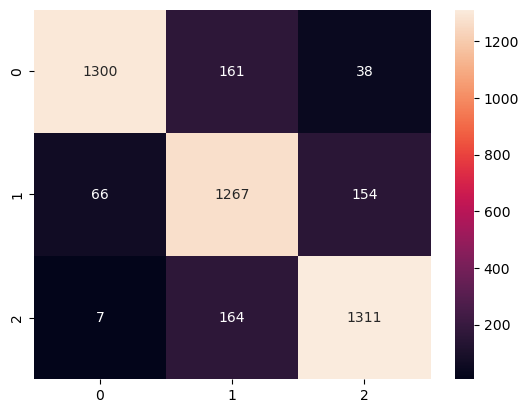

In [29]:
print(f'Accuracy del entrenamiento para regresion logistica es: {accuracy_train_1_final}')
print(f'F1 score del entrenamiento para regresion logistica es: {f1_train_1_final}')
sb.heatmap(matrix_train_1_final, annot = True, fmt = 'd')
plt.show()

### Métricas En Pruebas

In [30]:
y_pred_test_final_1 = modelo_1_final.predict(x_test)
accuracy_test_1_final = accuracy_score(y_test, y_pred_test_final_1)
matrix_test_1_final = confusion_matrix(y_test, y_pred_test_final_1)
f1_test_1_final = f1_score(y_test, y_pred_test_final_1, average='weighted')

Accuracy de las pruebas para regresion logistica es: 0.8551307847082495
F1 score de la pruebas para regresion logistica es: 0.8553668049351829


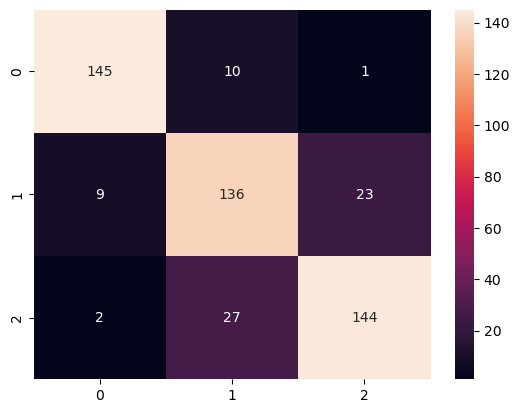

In [31]:
print(f'Accuracy de las pruebas para regresion logistica es: {accuracy_test_1_final}')
print(f'F1 score de la pruebas para regresion logistica es: {f1_test_1_final}')
sb.heatmap(matrix_test_1_final, annot = True, fmt = 'd')
plt.show()

## SVC

### Entrenamiento

In [32]:
modelo_2 = SVC()
hiper_grid = {'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 15, 20,25], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4, 5]}

In [33]:
classifier_e = GridSearchCV(estimator = modelo_2,
                            param_grid = hiper_grid,
                            cv = 3)
classifier_e.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 15, 20, 25],
                         'degree': [2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [34]:
validation = pd.concat([pd.DataFrame(classifier_e.cv_results_['params']), pd.DataFrame(classifier_e.cv_results_['mean_test_score'], columns = ['Accuracy'])], axis = 1)
validation.sort_values('Accuracy', ascending = False)

,C,degree,kernel,Accuracy
93,10.0000,5,poly,0.967548
141,25.0000,5,poly,0.966428
125,20.0000,5,poly,0.965310
137,25.0000,4,poly,0.965309
109,15.0000,5,poly,0.964638
...,...,...,...,...
23,0.0010,3,sigmoid,0.335497
26,0.0010,4,rbf,0.335497
27,0.0010,4,sigmoid,0.335497
30,0.0010,5,rbf,0.335497


In [35]:
modelo_2_final = classifier_e.best_estimator_
modelo_2_final

SVC(C=10, degree=5, kernel='poly')

### Métricas en Entrenamiento

In [36]:
y_pred_train_final_2 = modelo_2_final.predict(x_train)
accuracy_train_2_final = accuracy_score(y_train, y_pred_train_final_2)
matrix_train_2_final = confusion_matrix(y_train, y_pred_train_final_2)
f1_train_2_final = f1_score(y_train, y_pred_train_final_2, average='weighted')

Accuracy del entrenamiento para SVC es: 0.9823187108325873
F1 score del entrenamiento para SVC es: 0.9823529838847154


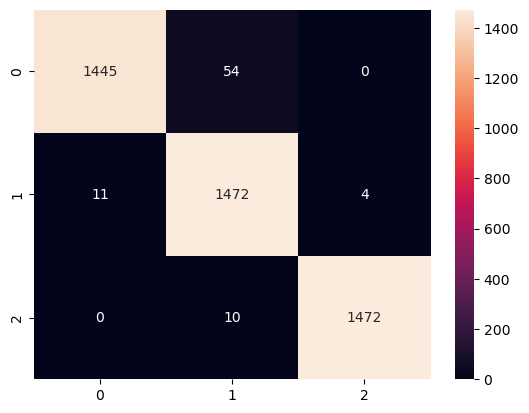

In [37]:
print(f'Accuracy del entrenamiento para SVC es: {accuracy_train_2_final}')
print(f'F1 score del entrenamiento para SVC es: {f1_train_2_final}')
sb.heatmap(matrix_train_2_final, annot = True, fmt = 'd')
plt.show()

### Métricas en Pruebas

In [38]:
y_pred_test_final_2 = modelo_2_final.predict(x_test)
accuracy_test_2_final = accuracy_score(y_test, y_pred_test_final_2)
matrix_test_2_final = confusion_matrix(y_test, y_pred_test_final_2)
f1_test_2_final = f1_score(y_test, y_pred_test_final_2, average='weighted')

Accuracy de las pruebas para SVC es: 0.9778672032193159
F1 score de las pruebas para SVC es: 0.9779302140821317


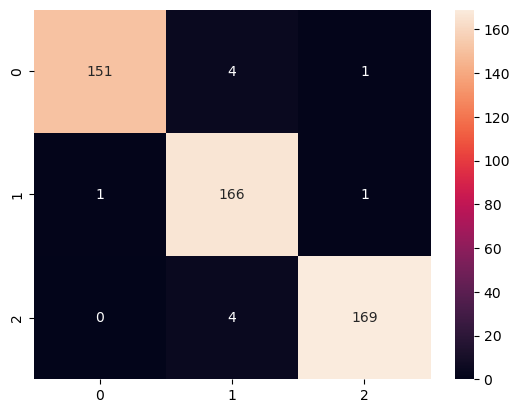

In [40]:
print(f'Accuracy de las pruebas para SVC es: {accuracy_test_2_final}')
print(f'F1 score de las pruebas para SVC es: {f1_test_2_final}')
sb.heatmap(matrix_test_2_final, annot = True, fmt = 'd')
plt.show()

## KNeighbors Classifier

### Entrenamiento

In [41]:
modelo_3 = KNeighborsClassifier()
hiper_grid = {'n_neighbors' : [3, 5, 7, 9, 11],
              'p' : [1, 2]}

In [42]:
classifier_e = GridSearchCV(estimator = modelo_3,
                            param_grid = hiper_grid,
                            cv = 3)
classifier_e.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]})

In [43]:
validation = pd.concat([pd.DataFrame(classifier_e.cv_results_['params']), pd.DataFrame(classifier_e.cv_results_['mean_test_score'], columns = ['Accuracy'])], axis = 1)
validation.sort_values('Accuracy', ascending = False)

,n_neighbors,p,Accuracy
0,3,1,0.959713
1,3,2,0.959265
3,5,2,0.950312
2,5,1,0.943598
4,7,1,0.929721
5,7,2,0.929719
7,9,2,0.914502
6,9,1,0.910472
9,11,2,0.907787
8,11,1,0.903982


In [44]:
modelo_3_final = classifier_e.best_estimator_
modelo_3_final

KNeighborsClassifier(n_neighbors=3, p=1)

### Métricas En Entrenamiento

In [45]:
y_pred_train_final_3 = modelo_3_final.predict(x_train)
accuracy_train_3_final = accuracy_score(y_train, y_pred_train_final_3)
matrix_train_3_final = confusion_matrix(y_train, y_pred_train_final_3)
f1_train_3_final = f1_score(y_train, y_pred_train_final_3, average='weighted')

Accuracy del entrenamiento para K-Vecinos es: 0.9858997314234557
F1 score del entrenamiento para K-Vecinos es: 0.9858774395193977


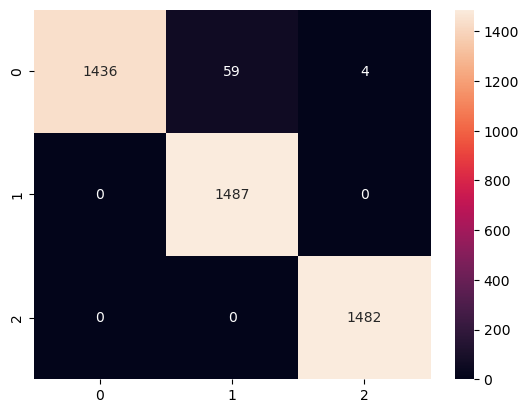

In [46]:
print(f'Accuracy del entrenamiento para K-Vecinos es: {accuracy_train_3_final}')
print(f'F1 score del entrenamiento para K-Vecinos es: {f1_train_3_final}')
sb.heatmap(matrix_train_3_final, annot = True, fmt = 'd')
plt.show()

### Métricas En Pruebas

In [47]:
y_pred_test_final_3 = modelo_3_final.predict(x_test)
accuracy_test_3_final = accuracy_score(y_test, y_pred_test_final_3)
matrix_test_3_final = confusion_matrix(y_test, y_pred_test_final_3)
f1_test_3_final = f1_score(y_test, y_pred_test_final_3, average='weighted')

Accuracy de las pruebas para K-Vecinos es: 0.9798792756539235
F1 score de las pruebas para K-Vecinos es: 0.9797852501260175


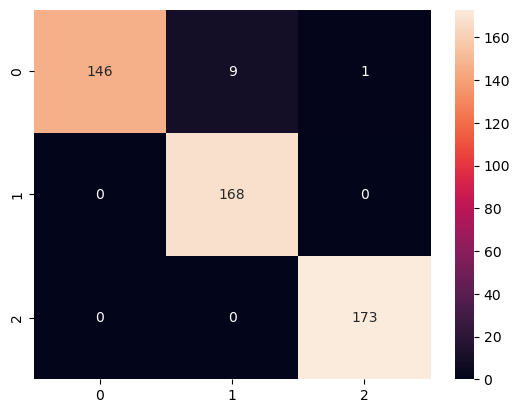

In [49]:
print(f'Accuracy de las pruebas para K-Vecinos es: {accuracy_test_3_final}')
print(f'F1 score de las pruebas para K-Vecinos es: {f1_test_3_final}')
sb.heatmap(matrix_test_3_final, annot = True, fmt = 'd')
plt.show()

## Decision Tree Classifier

### Entrenamiento

In [50]:
modelo_4 = DecisionTreeClassifier()
hiper_grid = {'criterion':['log_loss','gini','entropy'], 
              'max_depth': [5,15,20,25,30],
              'min_samples_split':[2,3,4,5],
              'max_leaf_nodes':[None, 10, 12, 15]}

In [51]:
classifier_e = GridSearchCV(estimator = modelo_4,
                            param_grid = hiper_grid,
                            cv = 3)
classifier_e.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['log_loss', 'gini', 'entropy'],
                         'max_depth': [5, 15, 20, 25, 30],
                         'max_leaf_nodes': [None, 10, 12, 15],
                         'min_samples_split': [2, 3, 4, 5]})

In [52]:
validation = pd.concat([pd.DataFrame(classifier_e.cv_results_['params']), pd.DataFrame(classifier_e.cv_results_['mean_test_score'], columns = ['Accuracy'])], axis = 1)
validation.sort_values('Accuracy', ascending = False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,Accuracy
208,entropy,25,NaN,2,0.978514
48,log_loss,25,NaN,2,0.978289
65,log_loss,30,NaN,3,0.978066
224,entropy,30,NaN,2,0.978066
176,entropy,15,NaN,2,0.978066
...,...,...,...,...,...
166,entropy,5,10.0,4,0.887422
165,entropy,5,10.0,3,0.887422
4,log_loss,5,10.0,2,0.887422
164,entropy,5,10.0,2,0.887422


In [53]:
modelo_4_final = classifier_e.best_estimator_
modelo_4_final

DecisionTreeClassifier(criterion='entropy', max_depth=25)

### Métricas En Entrenamiento

In [58]:
y_pred_train_final_4 = modelo_4_final.predict(x_train)
accuracy_train_4_final = accuracy_score(y_train, y_pred_train_final_4)
matrix_train_4_final = confusion_matrix(y_train, y_pred_train_final_4)
f1_train_4_final = f1_score(y_train, y_pred_train_final_4, average='weighted')

Accuracy del entrenamiento para Árbol de Decisión es: 0.9995523724261415
F1 score del entrenamiento para Árbol de Decisión es: 0.9995523734302301


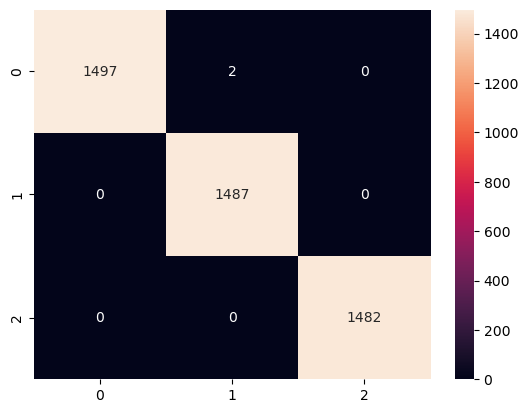

In [55]:
print(f'Accuracy del entrenamiento para Árbol de Decisión es: {accuracy_train_4_final}')
print(f'F1 score del entrenamiento para Árbol de Decisión es: {f1_train_4_final}')
sb.heatmap(matrix_train_4_final, annot = True, fmt = 'd')
plt.show()

### Métricas En Pruebas

In [56]:
y_pred_test_final_4 = modelo_4_final.predict(x_test)
accuracy_test_4_final = accuracy_score(y_test, y_pred_test_final_4)
matrix_test_4_final = confusion_matrix(y_test, y_pred_test_final_4)
f1_test_4_final = f1_score(y_test, y_pred_test_final_4, average='weighted')

Accuracy de pruebas para Árbol de Decisión es: 0.9879275653923542
F1 score de pruebas para Árbol de Decisión es: 0.9879151067395082


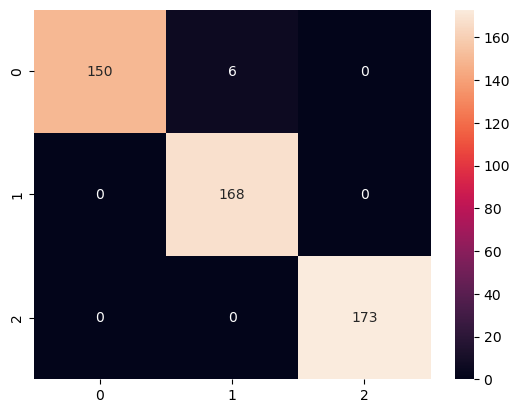

In [57]:
print(f'Accuracy de pruebas para Árbol de Decisión es: {accuracy_test_4_final}')
print(f'F1 score de pruebas para Árbol de Decisión es: {f1_test_4_final}')
sb.heatmap(matrix_test_4_final, annot = True, fmt = 'd')
plt.show()

## Random Forest Classifier

### Entrenamiento

In [59]:
modelo_5 = RandomForestClassifier(random_state = 16)
hiper_grid = {'n_estimators' : [100, 200],#Worst Performing 300],
              'criterion' : ['gini', 'entropy'], #Was by far the worst performing, 'log_loss'],
              'max_depth' : [15, 20, 25, 30, 35],
              'min_samples_split' : [2, 3, 4, 5],
              'max_leaf_nodes' : [None, 10, 12, 15]}

In [62]:
classifier_e = GridSearchCV(estimator = modelo_5,
                            param_grid = hiper_grid,
                            cv = 3,
                            verbose=1)
classifier_e.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=16),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 25, 30, 35],
                         'max_leaf_nodes': [None, 10, 12, 15],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200]},
             verbose=1)

In [63]:
validation = pd.concat([pd.DataFrame(classifier_e.cv_results_['params']), pd.DataFrame(classifier_e.cv_results_['mean_test_score'], columns = ['Accuracy'])], axis = 1)
validation.sort_values('Accuracy', ascending = False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,n_estimators,Accuracy
130,gini,35,NaN,3,100,0.985451
66,gini,25,NaN,3,100,0.985451
98,gini,30,NaN,3,100,0.985451
34,gini,20,NaN,3,100,0.985451
195,entropy,20,NaN,3,200,0.985451
...,...,...,...,...,...,...
207,entropy,20,10.0,5,200,0.895030
271,entropy,30,10.0,5,200,0.895030
265,entropy,30,10.0,2,200,0.895030
269,entropy,30,10.0,4,200,0.895030


In [64]:
modelo_5_final = classifier_e.best_estimator_
modelo_5_final

RandomForestClassifier(max_depth=20, min_samples_split=3, random_state=16)

### Métricas En Entrenamiento

In [65]:
y_pred_train_final_5 = modelo_5_final.predict(x_train)
accuracy_train_5_final = accuracy_score(y_train, y_pred_train_final_5)
matrix_train_5_final = confusion_matrix(y_train, y_pred_train_final_5)
f1_train_5_final = f1_score(y_train, y_pred_train_final_5, average='weighted')

Accuracy del entrenamiento para RandomForest es: 0.9995523724261415
F1 score del entrenamiento para RandomForest es: 0.9995523734302301


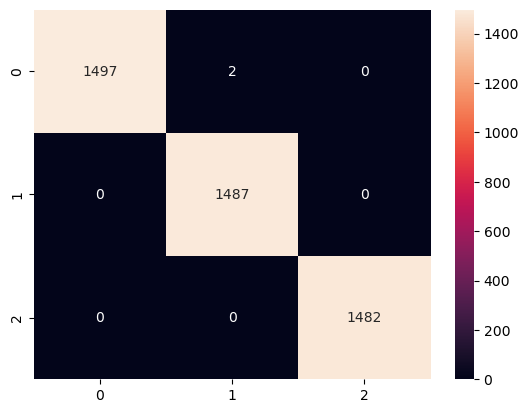

In [66]:
print(f'Accuracy del entrenamiento para RandomForest es: {accuracy_train_5_final}')
print(f'F1 score del entrenamiento para RandomForest es: {f1_train_5_final}')
sb.heatmap(matrix_train_5_final, annot = True, fmt = 'd')
plt.show()

### Métricas En Pruebas

In [67]:
y_pred_test_final_5 = modelo_5_final.predict(x_test)
accuracy_test_5_final = accuracy_score(y_test, y_pred_test_final_5)
matrix_test_5_final = confusion_matrix(y_test, y_pred_test_final_5)
f1_test_5_final = f1_score(y_test, y_pred_test_final_5, average='weighted')

Accuracy de las pruebas para Random Forest es: 0.9919517102615694
F1 score de las pruebas para Random Forest es: 0.9919290568058338


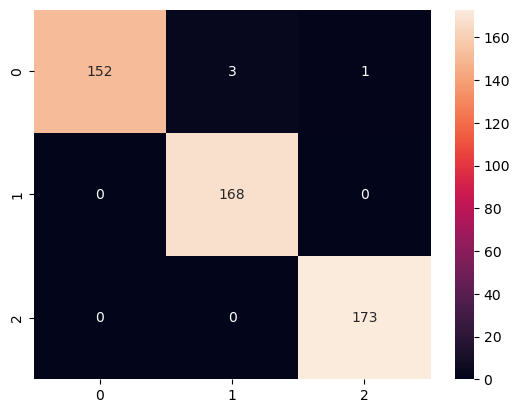

In [68]:
print(f'Accuracy de las pruebas para Random Forest es: {accuracy_test_5_final}')
print(f'F1 score de las pruebas para Random Forest es: {f1_test_5_final}')
sb.heatmap(matrix_test_5_final, annot = True, fmt = 'd')
plt.show()

## Gradient Boost Classifier

### Entrenamiento

In [68]:
modelo_6 = GradientBoostingClassifier(random_state = 16)
hiper_grid = {'n_estimators' : [100, 200, 300],
              'criterion' : ['squared_error', 'friedman_mse'],
              'max_depth' : [15, 20, 25, 30],
              'min_samples_split' : [2, 3, 4, 5],
              'max_leaf_nodes' : [None,10,12,15]}

In [69]:
classifier_e = GridSearchCV(estimator = modelo_6,
                            param_grid = hiper_grid,
                            cv = 3
                            )
classifier_e.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=16),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [15, 20, 25, 30],
                         'max_leaf_nodes': [None, 10, 12, 15],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [70]:
validation = pd.concat([pd.DataFrame(classifier_e.cv_results_['params']), pd.DataFrame(classifier_e.cv_results_['mean_test_score'], columns = ['Accuracy'])], axis = 1)
validation.sort_values('Accuracy', ascending = False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,n_estimators,Accuracy
383,friedman_mse,30,15.0,5,300,0.987914
239,friedman_mse,15,15.0,5,300,0.987914
191,squared_error,30,15.0,5,300,0.987914
335,friedman_mse,25,15.0,5,300,0.987914
143,squared_error,25,15.0,5,300,0.987914
...,...,...,...,...,...,...
98,squared_error,25,NaN,2,300,0.982094
197,friedman_mse,15,NaN,3,300,0.982094
145,squared_error,30,NaN,2,200,0.981871
241,friedman_mse,20,NaN,2,200,0.981871


In [71]:
modelo_6_final = classifier_e.best_estimator_
modelo_6_final

GradientBoostingClassifier(criterion='squared_error', max_depth=15,
                           max_leaf_nodes=15, min_samples_split=5,
                           n_estimators=300, random_state=16)

### Métricas en Entrenamiento

In [72]:
y_pred_train_final_6 = modelo_6_final.predict(x_train)
accuracy_train_6_final = accuracy_score(y_train, y_pred_train_final_6)
matrix_train_6_final = confusion_matrix(y_train, y_pred_train_final_6)
f1_train_6_final = f1_score(y_train, y_pred_train_final_6, average='weighted')

Accuracy del entrenamiento para GradientBoosting es: 0.9995523724261415
F1 score del entrenamiento para GradientBoosting es: 0.9995523734302301


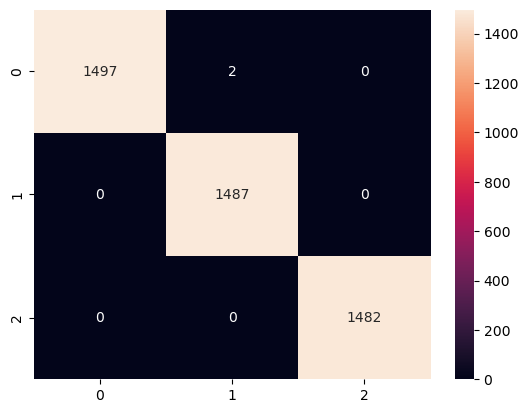

In [73]:
print(f'Accuracy del entrenamiento para GradientBoosting es: {accuracy_train_6_final}')
print(f'F1 score del entrenamiento para GradientBoosting es: {f1_train_6_final}')
sb.heatmap(matrix_train_6_final, annot = True, fmt = 'd')
plt.show()

### Métricas en Pruebas

In [74]:
y_pred_test_final_6 = modelo_6_final.predict(x_test)
accuracy_test_6_final = accuracy_score(y_test, y_pred_test_final_6)
matrix_test_6_final = confusion_matrix(y_test, y_pred_test_final_6)
f1_test_6_final = f1_score(y_test, y_pred_test_final_6, average='weighted')

Accuracy de las pruebas para GradientBoosting es: 0.9959758551307847
F1 score de las pruebas para GradientBoosting es: 0.9959747797723543


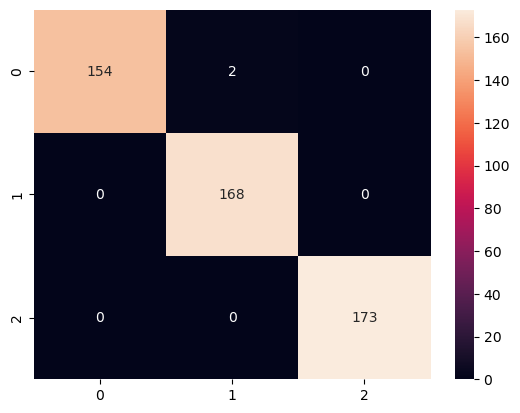

In [75]:
print(f'Accuracy de las pruebas para GradientBoosting es: {accuracy_test_6_final}')
print(f'F1 score de las pruebas para GradientBoosting es: {f1_test_6_final}')
sb.heatmap(matrix_test_6_final, annot = True, fmt = 'd')
plt.show()

## AdaBoost Classifier

### Entrenamiento

In [70]:
modelo_7 = AdaBoostClassifier(random_state = 16)
hiper_grid = {'n_estimators' : [100, 200, 300]}

In [71]:
classifier_e = GridSearchCV(estimator = modelo_7,
                            param_grid = hiper_grid,
                            cv = 3
                            )
classifier_e.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=16),
             param_grid={'n_estimators': [100, 200, 300]})

In [72]:
validation = pd.concat([pd.DataFrame(classifier_e.cv_results_['params']), pd.DataFrame(classifier_e.cv_results_['mean_test_score'], columns = ['Accuracy'])], axis = 1)
validation.sort_values('Accuracy', ascending = False)

,n_estimators,Accuracy
0,100,0.857426
1,200,0.856761
2,300,0.855861


In [73]:
modelo_7_final = classifier_e.best_estimator_
modelo_7_final

AdaBoostClassifier(n_estimators=100, random_state=16)

### Métricas En Entrenamiento

In [74]:
y_pred_train_final_7 = modelo_7_final.predict(x_train)
accuracy_train_7_final = accuracy_score(y_train, y_pred_train_final_7)
matrix_train_7_final = confusion_matrix(y_train, y_pred_train_final_7)
f1_train_7_final = f1_score(y_train, y_pred_train_final_7, average='weighted')

Accuracy del entrenamiento para AdaBoosting es: 0.8551924798567592
F1 score del entrenamiento para AdaBoosting es: 0.8573527067216754


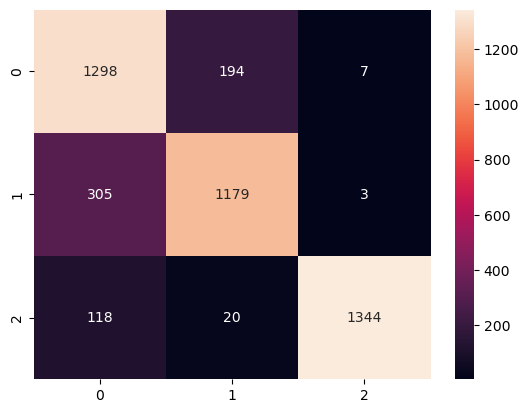

In [76]:
print(f'Accuracy del entrenamiento para AdaBoosting es: {accuracy_train_7_final}')
print(f'F1 score del entrenamiento para AdaBoosting es: {f1_train_7_final}')
sb.heatmap(matrix_train_7_final, annot = True, fmt = 'd')
plt.show()

### Métricas En pruebas

In [77]:
y_pred_test_final_7 = modelo_7_final.predict(x_test)
accuracy_test_7_final = accuracy_score(y_test, y_pred_test_final_7)
matrix_test_7_final = confusion_matrix(y_test, y_pred_test_final_7)
f1_test_7_final = f1_score(y_test, y_pred_test_final_7, average='weighted')

Accuracy de las pruebas para AdaBoosting es: 0.8450704225352113
F1 score de las pruebas para AdaBoosting es: 0.8480601299015236


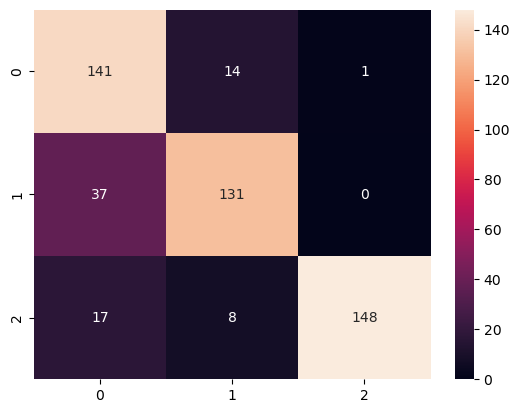

In [81]:
print(f'Accuracy de las pruebas para AdaBoosting es: {accuracy_test_7_final}')
print(f'F1 score de las pruebas para AdaBoosting es: {f1_test_7_final}')
sb.heatmap(matrix_test_7_final, annot = True, fmt = 'd')
plt.show()

## Resultados

|Model |Accuracy | F1 Score | 
|-----|-----|-----|
|Regresión Logística | 85.5% | 85.5% |
|SVC | 97.8% | 97.8% |
|K-Vecinos | 98.6% | 98.6% |
|Árbol Decisión | 98.8% | 98.8% |
|Random Forest | 99.2% | 99.2% |
|Gradient Boosting | 99.6% | 99.6% |
|Ada Boosting |84.5% | 84.8% |

## Modelo Seleccionado

Gradient Boosting con Accuracy y F1 Score de 99.6%

y matriz de confusión:

![Matriz de Confusión De Gradient Boosting](data/gradient_boost_matrix.png)
